# **Куртиш Григорий 737-01**

In [ ]:
# Загружаем недостающие библиотеки
%pip install numpy pandas tensorflow scikit-learn scipy matplotlib --quiet

# Diabetes

Набор данных Sklearn о диабете включает следующие атрибуты:

* age: Возраст в годах
* sex: Пол пациента
* bmi: Индекс массы тела артериальное
* bp: Среднее артериальное давление
* s1: Общий холестерин в сыворотке крови (ОХС)
* s2: Липопротеины низкой плотности (ЛПНП)
* s3: Липопротеины высокой плотности (ЛПВП)
* s4: Общий холестерин / ЛПВП (тч)
* s5: Возможно, уровень триглицеридов в сыворотке крови (ltg)
* s6: Уровень сахара в крови (глюкоза)

Задание:
1. Исследовать датасет (провести EDA, есть пример с предыдущих семинаров)
2. Обучить модель линейной регрессии на этом датасете
3. Сделать визуализацию (кривая обучения и кривая ошибок)

In [ ]:
# Библиотеки, которые могут пригодиться:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

from sklearn.linear_model import LinearRegression

In [ ]:
# загрузка датасета
diabetes = datasets.load_diabetes()

In [ ]:
# Create dataframe for features
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# print(diabetes.target)
print(diabetes.target.shape)

(442,)


# Разведочный анализ данных (EDA)

In [ ]:
diabetes_df.shape # 442 строки, 10 признаков

(442, 10)

In [ ]:
# Посмотрим общий вид таблицы признаков
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# Основные статистики
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


АНАЛИЗ:

https://www.geeksforgeeks.org/data-analysis/z-score-normalization-definition-and-examples/

Нормализация: Все переменные были стандартизированы (z-score нормализация), о чем свидетельствует:

*   Средние значения близки к нулю (10^-16 - 10^-19)
*   Стандартные отклонения одинаковы (0.0476)

In [ ]:
# Проверим пропуски в данных
diabetes_df.isna().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


АНАЛИЗ:
Хороший случай, пропусков в данных нет

In [ ]:
# Create dataframe for target
diabetes_target = pd.DataFrame(data=diabetes.target, columns=["target"])
diabetes_target.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [ ]:
# Concatenate features and target dataframes to get full dataframe
full_df = pd.concat([diabetes_df, diabetes_target], axis=1)
full_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# **Отобразим зависимость между отдельными признакоми (столбцом diabetes_df) и целевой переменной (diabetes_target)**

Красная линия - это линия линейной регрессии, показывающая общий тренд взаимосвязи
Красное поле вокруг линии - это доверительный интервал (в функции sns.regplot параметр ci=95)

Визуализация помогает быстро оценить, какие признаки имеют линейную зависимость с целевой переменной.



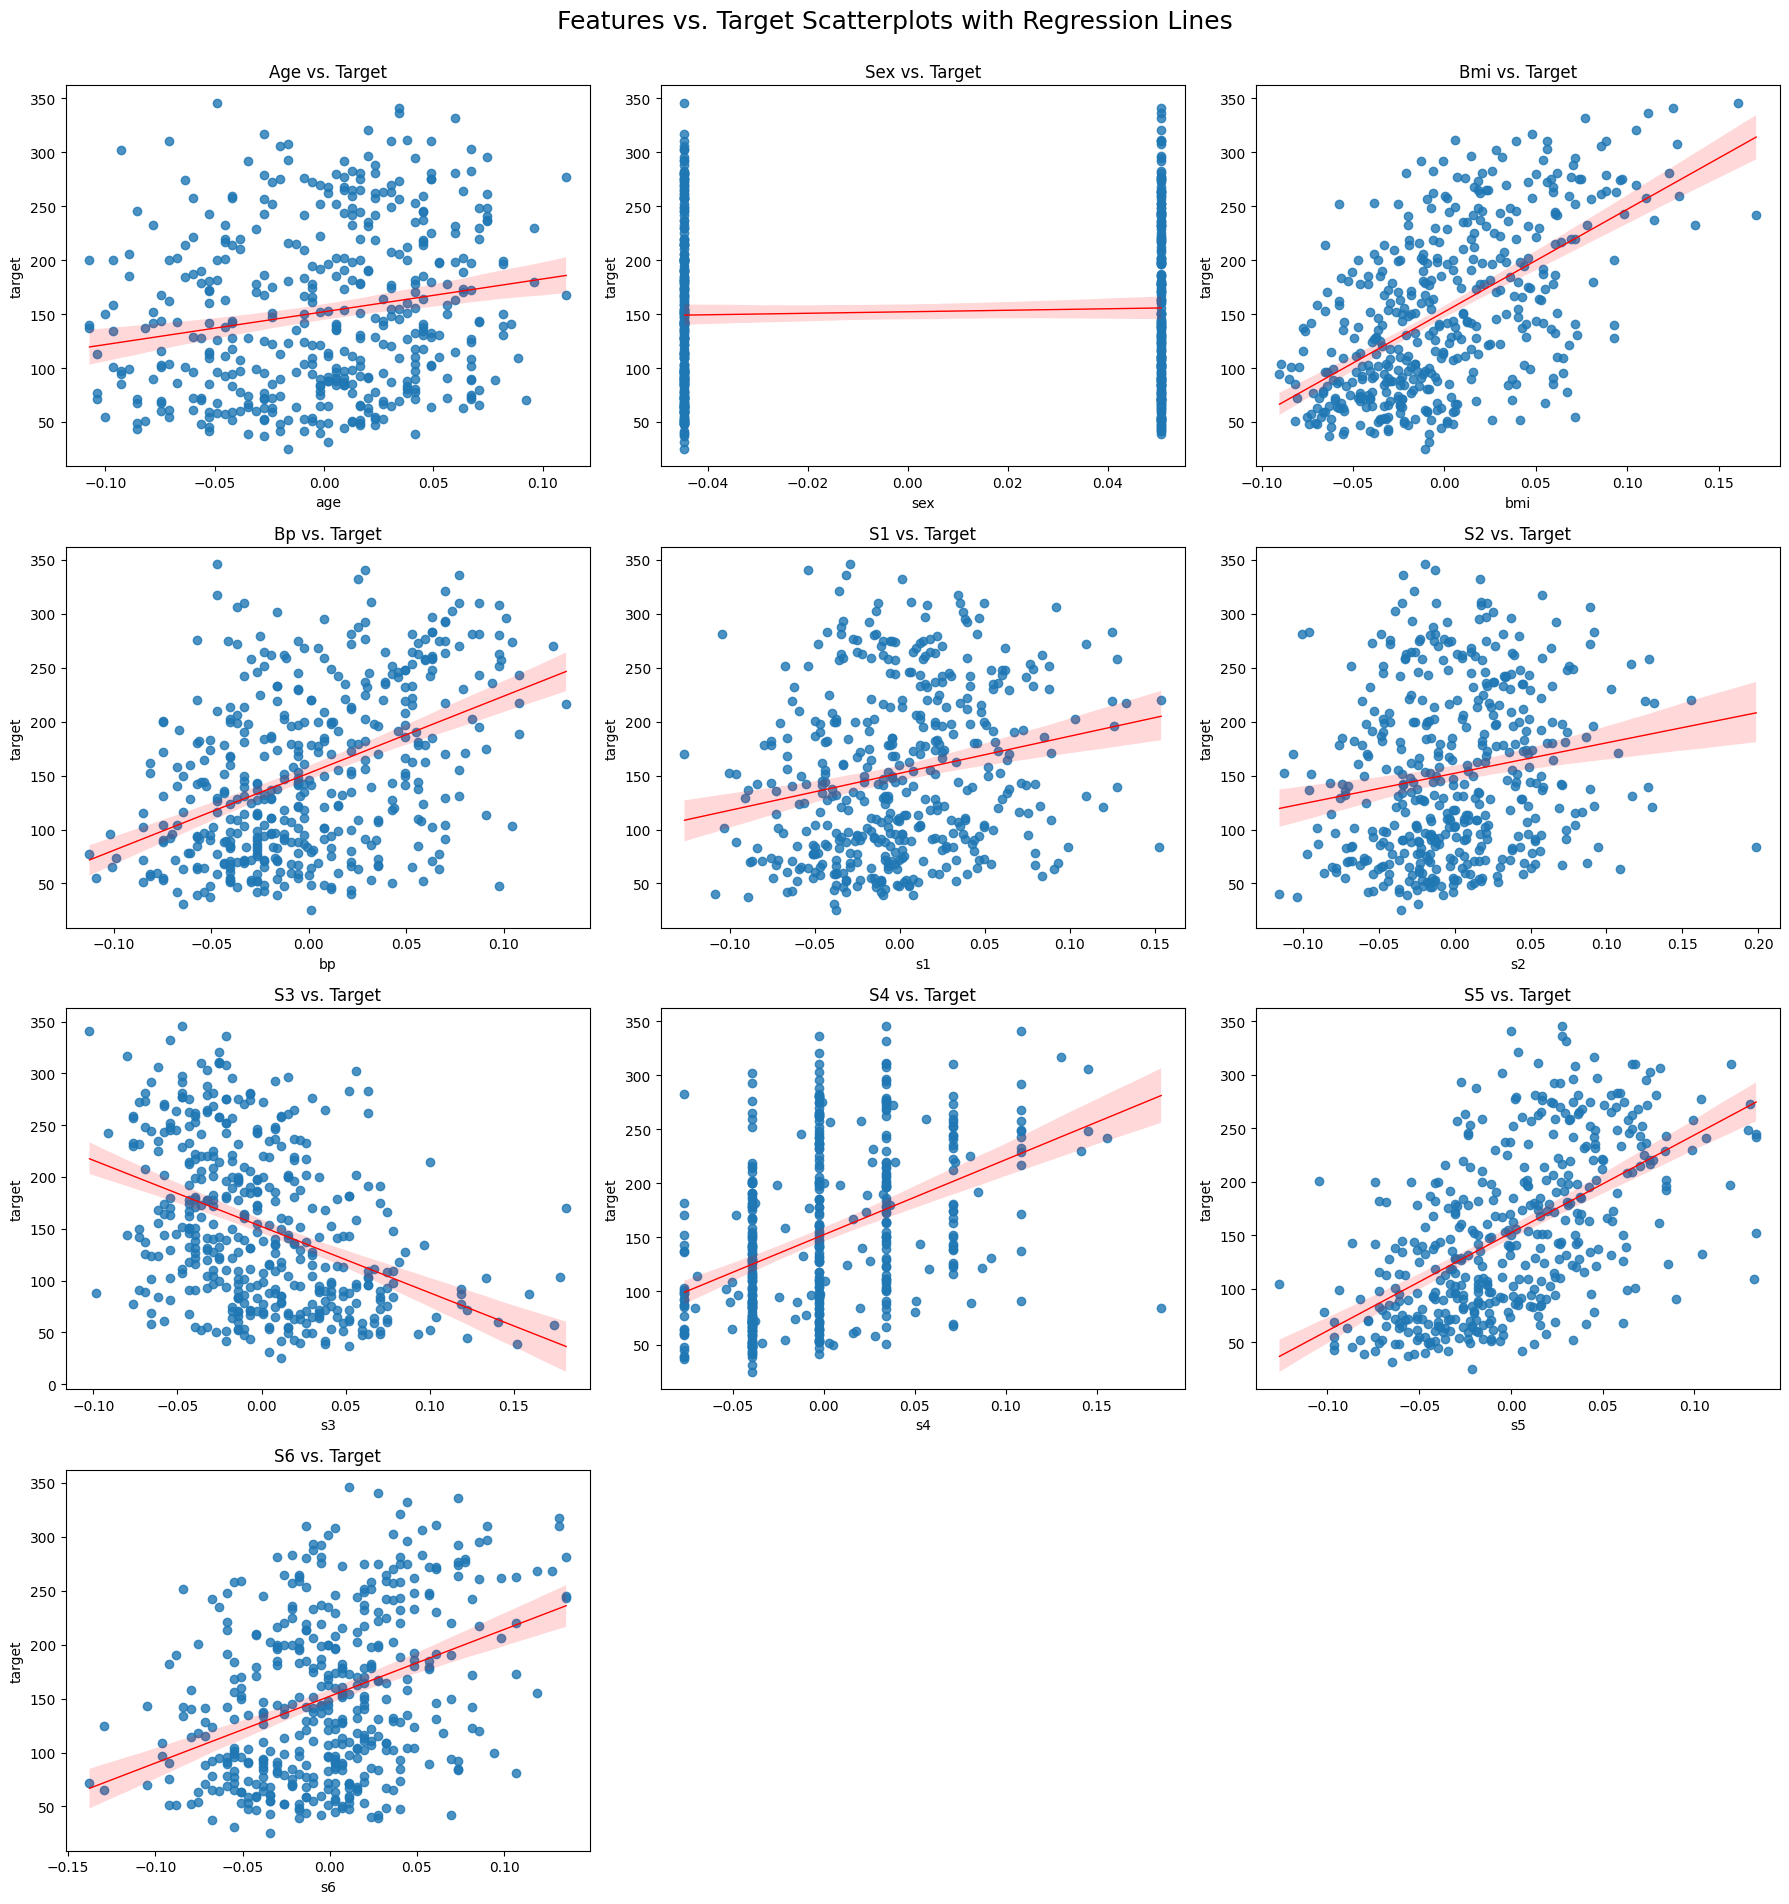

In [ ]:
# Числа сетки графиков
n_plts = len(diabetes_df.columns) # number of plots
n_cols = 3 # number of cols per row
n_rows = (n_plts + n_cols - 1) // n_cols # total number of rows
width = 6*n_cols
height = 5*n_rows

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(width,height))
axes = axes.flatten()

# Set centered super title to the figure
fig.suptitle("Features vs. Target Scatterplots with Regression Lines", fontsize=18, y=0.95)

# Plot each feature vs target
for i, col in enumerate(diabetes_df.columns):
    ax = axes[i]
    sns.regplot(x=diabetes_df[col], y=diabetes_target, ax=ax, line_kws={"color": "red", "lw": 1}, ci=95) # Plot data and a linear regression model fit with confidence level
    ax.set_title(f"{col.title()} vs. Target") # Set title for each subplot
    ax.set_xlabel(col) # Set x-axis label
    ax.set_ylabel(diabetes_target.columns[0]) # Set y-axis label

# Remove empty subplots
for j in range(n_plts, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Анализ диаграмм рассеяния признаков и целевых показателей**

**Контекст:**
1) Построены диаграммы рассеяния, показывают взаимосвязь между каждым нормализованным входным показателем и целевой переменной target, которая является количественным показателем прогрессирования диабета через год.

2) Каждый график включает линию линейной регрессии с доверительным интервалом, что позволяет наглядно визуализировать потенциальные корреляции.

**Ключевые выводы из диаграмм рассеяния**

**ПОЛОЖИТЕЛЬНЫЕ КОРРЕЛЯЦИИ**

8 показателей имеют положительную корреляцию с целевой переменной. К ним относятся age, bmi, bp, s1, s2, s4, s5, и s6. По мере увеличения значений этих показателей прогнозируемое прогрессирование диабета также имеет тенденцию к увеличению. Эта тенденция особенно выражена для bmi, bp и s5

**ОТРИЦАТЕЛЬНЫЕ КОРРЕЛЯЦИИ**

s3 имеет отрицательную корреляцию с целевой переменной. s3 описывает уровень липопротеинов высокой плотности (ЛПВП) на основе документации scikit-learn. Это означает, что более высокие значения s3 связаны с более низкими показателями прогрессирования диабета. Согласно MedlinePlus Национальной медицинской библиотеки США, ЛПВП считаются хорошим холестерином, поскольку более высокие уровни ЛПВП могут снизить риск ишемической болезни сердца и инсульта. (Medline Plus, 2019)

**КЛАССОВЫЕ И БИНАРНЫЕ ПЕРЕМЕННЫЕ**

Переменная пола бинарная. В результате диаграмма рассеяния выглядит как две вертикальные полосы, а линия регрессии — плоская. Это означает, что линейная связь между полом и целевым показателем практически отсутствует.

Также есть s4 переменная, ее значения преимущественно представлены 6 числами (Возможно это классовая переменная или в группе принималась определенная специфика измерения данного параметра), однако есть и промежуточные значения.  
Параметр имеет положительную корреляцию с target.

Далее я построю корреляционную матрицу, чтобы подтвердить эти корреляции и выяснить, есть ли мультиколлинеарные проблемы внутри признаков.

In [ ]:
# Compute pairwise correlation of columns
corr = full_df.corr()

# Sort and view feature correlations with target
corr_target = corr["target"].sort_values(ascending=False)
display(corr_target)

,target
target,1.000000
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062


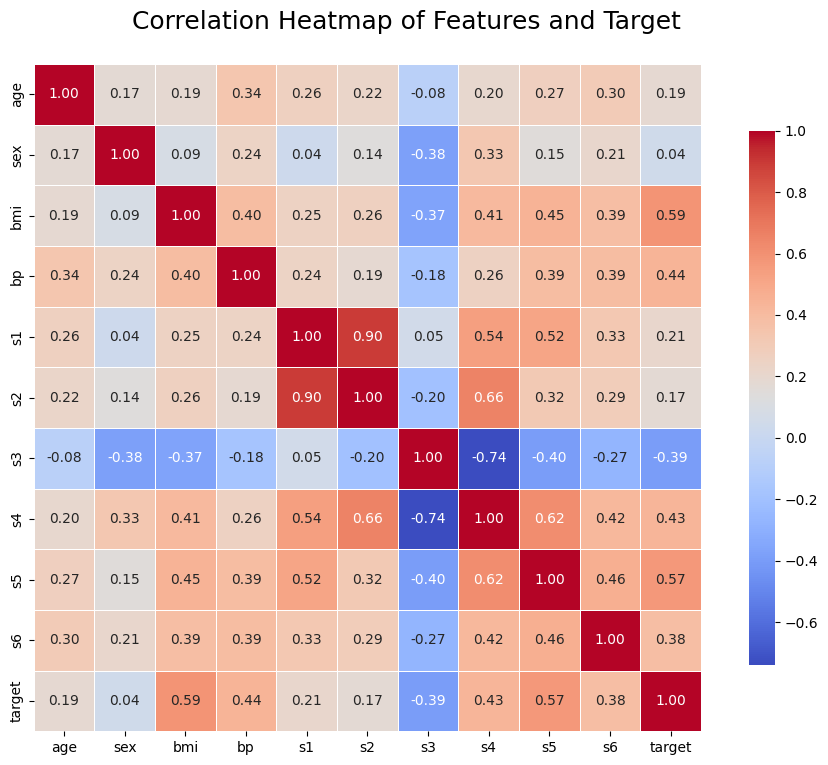

In [ ]:
# Create the heatmap figure
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True, # show correlation values
    fmt=".2f", # format to 2 decimal places
    cmap="coolwarm", # set color gradient
    square=True, # square cells
    linewidths=0.5, # line between cells
    cbar_kws={"shrink": 0.8} # set colorbar size
)

# Set centered super title to the figure
fig.suptitle("Correlation Heatmap of Features and Target", fontsize=18, y=0.95)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Анализ матрицы корреляции**

Тепловая карта (визуализация корреляционной матрицы) показывает, как каждый признак в наборе данных коррелирует с целевой переменной (прогрессирование диабета), а также как эти признаки связаны друг с другом.

**Ключевые выводы из тепловой карты корреляции**

1) Среди всех признаков bmi имеет самую сильную положительную корреляцию с целевым значением (0,59), за ним следует s5 (0,57). Эти две переменные, вероятно, будут иметь наибольшую прогностическую ценность в линейной модели.

2) В то же время, bp, s4 и s6 имеют умеренную положительную корреляцию с целевым значением с коэффициентами корреляции Пирсона 0,44, 0,43 и 0,38 соответственно. Эти признаки могут вносить значимый вклад в модель, но менее влиятельны, чем bmi и s5.

3) Наконец, пол имеет самую слабую корреляцию (0,04). **Это было замечено и ранее по почти горизонтальной корреляционной прямой.**

4) С другой стороны, s3 отрицательно коррелирует с целевым значением (-0,39), что означает, что **более высокие значения S3 связаны с более медленным прогрессированием диабета, как я уже отмечал ранее при анализе диаграммы рассеяния.**

5) Также наблюдается **мультиколлинеарность некоторых признаков.** Наиболее выраженная корреляция наблюдается между s1 и s2, где корреляция составляет 0,90. Другие умеренно высокие корреляции включают s2 и s4 (0,66), s4 и s5 (0,62) и s5 и s1 (0,52).

Поскольку s1 и s2 сильно коррелируют (коэффициент корреляции 0,90), я решил **исключить один из них.** Это помогает избежать потенциальных проблем с нестабильными или завышенными коэффициентами в модели линейной регрессии, которую я буду строить на более позднем этапе.

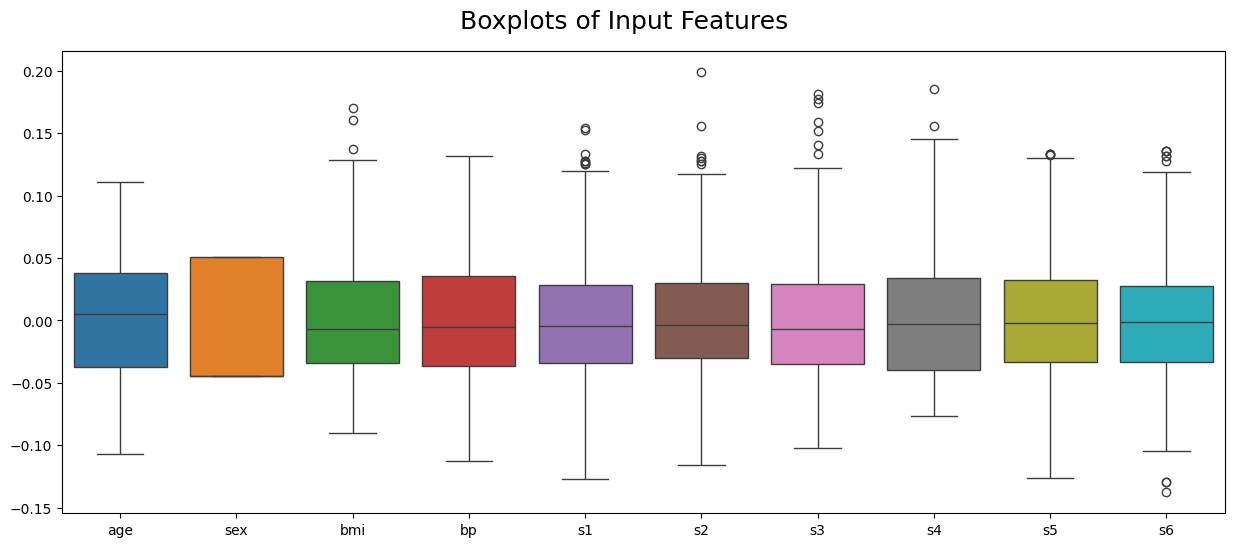

In [ ]:
fig = plt.figure(figsize=(15, 6))
sns.boxplot(data=full_df.drop(columns='target'))
fig.suptitle("Boxplots of Input Features", fontsize=18, y=0.95)
plt.show()

# **Анализ распределения признаков**

Эта ящичковая диаграмма представляет собой визуальную сводку распределения каждого признака в наборе данных по диабету.

**Ключевые выводы из ящичной диаграммы**

1) Все признаки центрированы вокруг 0.**В целом и так понимали до этого, тк определелили что данные нормализованы**

2) Большинство признаков также имеют схожий разброс, поскольку все они масштабированы по стандартному отклонению.
Выбросы присутствуют во многих признаках.

3) Я вижу точки над и под «усами» некоторых ящичных диаграмм. Они представляют выбросы.
Такие признаки, как bmi, s1, s2, s3, s4, s5 и s6, демонстрируют несколько выбросов в верхней части диапазона.
Для s6 наблюдаются выбросы в нижней части диапазона.

4) Размах (межквартильный размах) большинства признаков симметричен и узок, демонстрируя относительно равномерное распределение.

5) Чрезмерной асимметрии не наблюдается, хотя половые признаки более сжаты, что вполне объяснимо, поскольку они являются бинарными, имеют два различных значения и масштабируются.

В целом, диаграмма ящиков подтверждает, что набор данных был масштабирован, и ни один из признаков не доминирует в дисперсии.

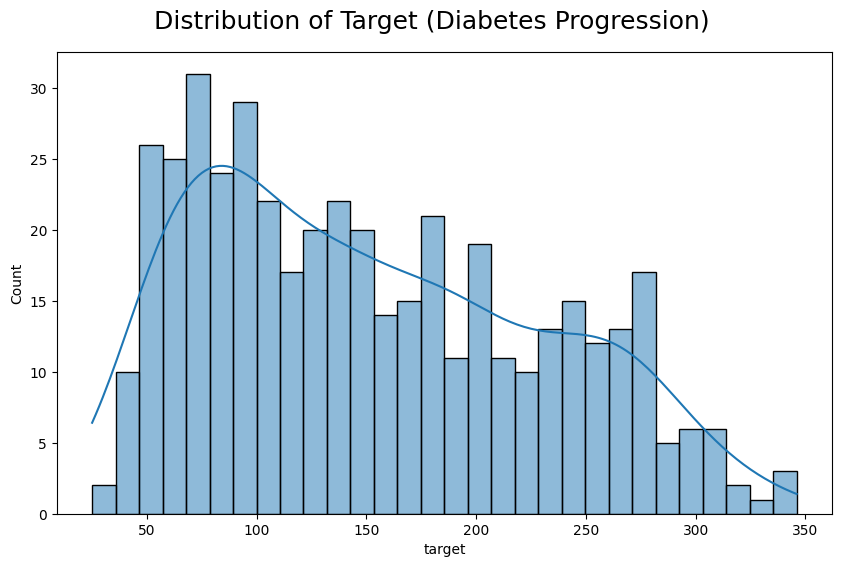

In [ ]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(full_df['target'], bins=30, kde=True)
fig.suptitle("Distribution of Target (Diabetes Progression)", fontsize=18, y=0.95)
plt.show()

# **Анализ целевого распределения**

Эта гистограмма показывает распределение целевой переменной: индекса прогрессирования диабета, который является количественной мерой прогрессирования заболевания через год после исходного уровня.

Ключевые выводы из гистограммы

1) Распределение целевой переменной имеет правую асимметрию. Пациентов с более низкими индексами прогрессирования больше.

2) У большинства пациентов индексы находятся в диапазоне от 50 до 100. Эти группы содержат самые высокие частоты.

3) Распределение имеет большую гранулярность при 30 группах. Это показывает меньшие колебания и вариации данных.

4) Сверху представлена ​​плавная кривая (KDE). Она показывает резкий рост низких показателей, а затем постепенное снижение.

Кривая KDE (Kernel Density Estimation), или оценка плотности ядра, представляет собой метод визуализации распределения данных. Она используется для создания гладкой, непрерывной кривой плотности вероятности на основе набора данных, что схоже с гистограммой, но без использования дискретных интервалов (бинов).

Общая форма распределения не соответствует нормальному. Длинный хвост справа показывает, что у некоторых пациентов индексы прогрессирования значительно выше.

# **Data Preprocessing**

In [ ]:
# Normalize or standardize the features if necessary
# Verify the statistics summary of input features
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [ ]:
# Verify the statistics summary of target
diabetes_target.describe()

,target
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


# **Анализ**

Признаки уже заданы.
Признаки центрированы по среднему.
Каждый столбец масштабирован таким образом, что сумма квадратов равна 1.
Поэтому я не буду проводить дополнительную стандартизацию признаков.

Для целевой выборки, несмотря на её правую асимметрию, я не буду применять никаких преобразований. Стандартная линейная регрессия не требует, чтобы целевая выборка была нормально распределена. Модель всё равно оптимизирует наиболее подходящую линию с помощью метода наименьших квадратов.

Если бы признаки не были стандартизированы, я бы использовал функцию StandardScaler() из sklearn.preprocessing для их масштабирования перед обучением. Это повышает производительность линейных моделей и гарантирует, что признаки будут иметь одинаковый масштаб.

Нормализация обычно используется при работе с алгоритмами, основанными на расстояниях, такими как KNN, где величина векторов признаков может смещать результаты. Поскольку я использую линейную регрессию, а данные уже стандартизированы, нормализация здесь не требуется.

Если бы я использовал нормализацию, я бы применил Normalizer(), чтобы убедиться, что каждая выборка (строка) имеет единичную длину. Это полезно в моделях, где направление данных важнее их величины, например, в KNN или алгоритмах, основанных на косинусном сходстве.

Исключить сильно коррелированную входную функцию
Поскольку s1 и s2 сильно коррелируют друг с другом, я опущу один из них, чтобы избежать проблемы мультиколлинеарности.

In [ ]:
X = diabetes_df.drop(columns=['s2'])
diabetes_df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

# **Анализ:**

При проверке с помощью isna().sum() в датафрейме не было пропущенных значений, поэтому мне не нужно их обрабатывать.

Если бы были пропущенные значения, я бы использовал либо dropna() для их удаления, либо fillna() для их заполнения.

Разделить набор данных на обучающий и тестовый наборы (например, в соотношении 80/20)

In [ ]:
# Verfiy the shape before split
print(diabetes_df.shape)
print(diabetes_target.shape)

(442, 10)
(442, 1)


In [ ]:
# Split into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_df, diabetes_target, test_size=0.2, random_state=42)

# Verify the shapes again
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353, 1)
(89, 10) (89, 1)


# **Анализ**

Для корректной оценки эффективности модели я разделил набор данных на две части:

Обучающий набор: 80% данных

Тестовый набор: 20% данных

Это позволяет модели изучить закономерности на обучающем наборе, а затем оценить её на ранее не исследованных данных (тестовом наборе).

Я использовал функцию train_test_split() из sklearn.model_selection с параметром random_state=42 для обеспечения воспроизводимости.

После разделения я использовал функцию .shape для проверки правильности разделения.

Теперь в X_train 353 строки.

Теперь в X_test 89 строк.
Размер столбцов остался прежним — 9 столбцов.

Для целевого значения y в y_train теперь 353 строки, а в y_test — 89 строк.
Если бы я использовал проверочный набор (например, для настройки гиперпараметров или выбора модели), я бы снова разделил обучающий набор, используя меньшую часть (например, 10–20%) в качестве проверочного набора.

Но поскольку размер набора данных для диабета относительно невелик (всего 442 образца), дальнейшее разделение уменьшит количество доступных обучающих данных.

В таких случаях часто лучше использовать перекрёстную проверку вместо того, чтобы создавать отдельный проверочный набор.

В целом, поскольку линейная регрессия не предполагает настройки гиперпараметров, мне не нужен отдельный проверочный набор. Однако, поскольку набор данных небольшой, я буду использовать перекрёстную проверку для более точной оценки обобщающей способности модели.

# Model Building

In [ ]:
# Use LinearRegression from Scikit-learn to train the model
model_lr = LinearRegression()

# Train the model on the training set
model_lr.fit(X_train, y_train)

LinearRegression()

# **Анализ**

Для построения модели я импортировал функцию LinearRegression из sklearn.linear_model.

После этого я создал экземпляр модели с помощью функции model_lr = LinearRegression(). Это создаёт базовую модель линейной регрессии с настройками по умолчанию (например, без регуляризации).

После создания экземпляра я обучил модель с помощью функции model_lr.fit(X_train, y_train). На этом этапе модель подгоняется под обучающие данные, выбирая оптимальные коэффициенты (веса) и свободные члены, которые минимизируют сумму квадратов остатков между фактическими и прогнозируемыми значениями.

После подгонки я вывел на экран параметры обученной модели.

Сначала я вывел на экран model_lr.intercept_ — константу смещения в уравнении линейной регрессии.

Чтобы лучше понять влияние каждого признака на целевую переменную, я создал DataFrame с именем coef_df, который сопоставляет каждый признак с соответствующим ему выученным коэффициентом.

Этот вывод показывает предполагаемый вес (наклон), присвоенный линейной регрессионной моделью каждому признаку.
Положительные значения coef_df указывают на положительное влияние на прогрессирование диабета, а отрицательные — на отрицательное.

In [ ]:
# Predict on the test set
y_pred = model_lr.predict(X_test) # numpy.ndarray
# type(y_pred)

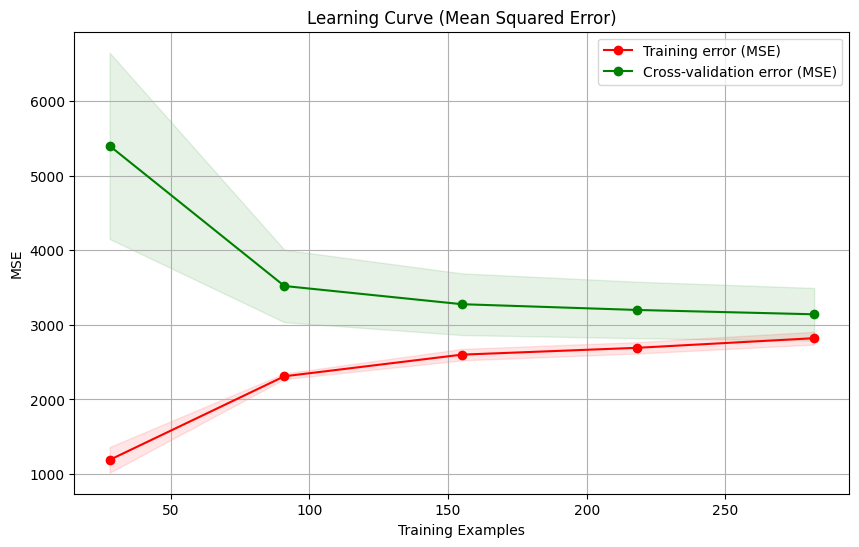

In [ ]:
# Источник: http://scikit-learn.org/0.15/auto_examples/plot_learning_curve.html
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Convert scores to positive MSE
train_scores_mse = -train_scores
test_scores_mse = -test_scores

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores_mse, axis=1)
train_scores_std = np.std(train_scores_mse, axis=1)
test_scores_mean = np.mean(test_scores_mse, axis=1)
test_scores_std = np.std(test_scores_mse, axis=1)

# Plot the learning curve (MSE)
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training error (MSE)")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation error (MSE)")

plt.title("Learning Curve (Mean Squared Error)")
plt.xlabel("Training Examples")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.grid()
plt.show()

Оценка производительности

Среднеквадратическая ошибка (MSE)

Среднеквадратическая ошибка (RMSE)

Оценка коэффициента детерминации (R²)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute mean squared error
mse = mean_squared_error(y_test, y_pred)

# Compute root mean squared error
rmse = np.sqrt(mse)

# Compute r2_score
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 2900.19
Root Mean Squared Error (RMSE): 53.85
R-squared (R2) Score: 0.45


# **Анализ эффективности модели**

Я оценил эффективность модели LinearRegression, используя стандартные регрессионные метрики:

Среднеквадратическая ошибка (MSE) составляет 2900,25, что соответствует среднему квадрату разницы между фактическими и прогнозируемыми значениями.

Среднеквадратическая ошибка (RMSE) составляет 53,85, что означает, что прогнозы модели отклоняются в среднем примерно на 54 единицы.

Коэффициент детерминации (R2) составляет 0,45, что говорит о том, что модель объясняет около 45% дисперсии целевой переменной в тестовом наборе.

В целом, модель LinearRegression демонстрирует умеренную эффективность. Она может уловить часть базового тренда, но я всё же могу попробовать использовать регуляризацию, например, Ridge и Lasso, чтобы посмотреть, есть ли улучшение эффективности.

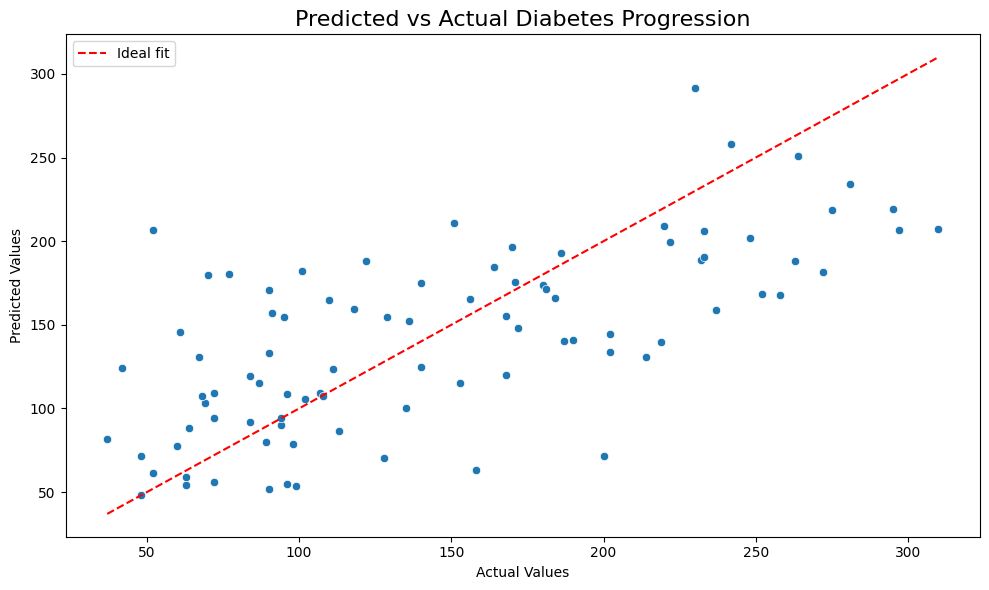

In [ ]:
# Create an empty figure
fig, ax = plt.subplots(figsize=(10, 6))

# Преобразуем в одномерные массивы
y_test_1d = y_test.values.ravel()  # для pandas DataFrame
y_pred_1d = y_pred.ravel()         # для numpy array

# Plot scatterplot on the axes
sns.scatterplot(x=y_test_1d, y=y_pred_1d, ax=ax)

# Plot reference line (perfect prediction)
min_val = min(y_test_1d.min(), y_pred_1d.min())
max_val = max(y_test_1d.max(), y_pred_1d.max())
ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal fit')

# Add axis labels and title
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Predicted vs Actual Diabetes Progression", fontsize=16)
ax.legend()

plt.tight_layout()
plt.show()

# **Анализ графика «предсказанные и фактические»**

Давайте посмотрим на эту диаграмму рассеяния.

Она наглядно показывает, как прогнозы нашей модели сравниваются с фактическими значениями прогрессирования диабета в тестовом наборе.

Каждая точка здесь представляет одного пациента. Ось X показывает фактический результат, а ось Y — предсказанный нашей моделью результат для этого пациента.

Согласно Scikit-learn, в идеальной задаче регрессии без шумов предсказанные значения будут точно попадать на диагональную линию (ŷ = y). Чем дальше точка от этой линии, тем больше ошибка. В реальных данных с шумом даже хорошая модель создаст облако точек, приблизительно сгруппированных вокруг диагонали. (Документация scikit-learn 1.7.0, 2025b)

Ключевые выводы

Из диаграммы рассеяния я могу сделать несколько важных наблюдений.

Общая тенденция действительно следует диагонали. Это означает, что эта модель линейной регрессии улавливает некоторый сигнал в данных.

Однако я также вижу значительный разброс, особенно вдали от крайних значений. Именно эта изменчивость и является причиной проблем модели.

Это подтверждается оценочными метриками, которые я вычислил ранее:

СКО составляет 2900,25, что представляет собой среднеквадратичную разницу между фактическими и прогнозируемыми значениями.

СКО составляет 53,85, то есть в среднем прогнозы модели отклоняются примерно на 54 единицы.

Коэффициент детерминации (R-квадрат) равен 0,45, что означает, что модель объясняет около 45% дисперсии целевой переменной в тестовом наборе данных.

В целом, модель демонстрирует умеренные результаты, особенно учитывая небольшой размер обучающего набора данных (353 записи).

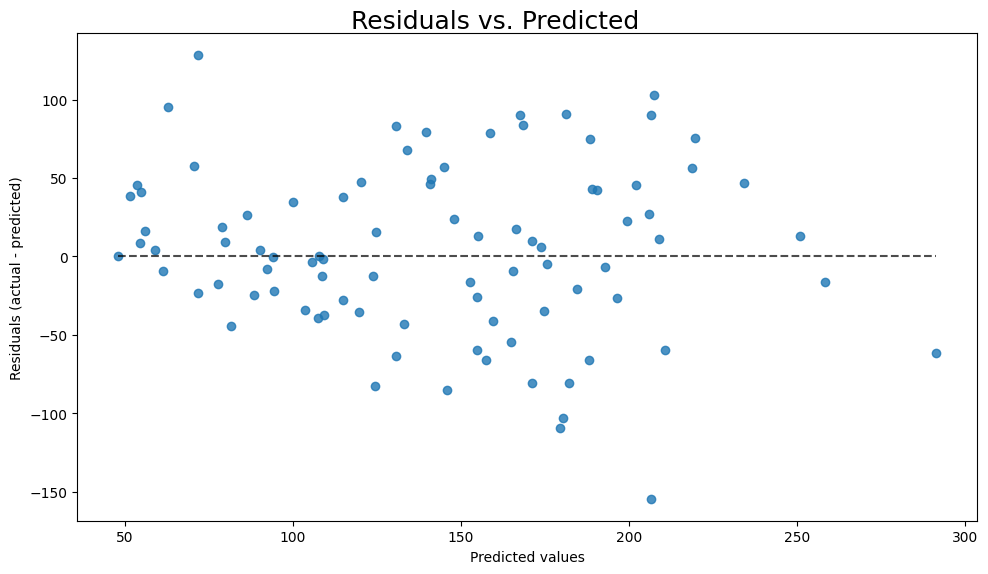

In [ ]:
from sklearn.metrics import PredictionErrorDisplay

# Create an empty figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot prediction error on the axes
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot(ax=ax)

# Add title and author ID
fig.suptitle("Residuals vs. Predicted", fontsize=18, y=0.95)

plt.tight_layout()
plt.show()

# **Анализ остатков и предсказанных значений**

Я использовал PredictionErrorDisplay из scikit-learn для построения графика зависимости остатков от предсказанных значений и визуальной оценки качества модели.

«Визуализация ошибки прогнозирования регрессионной модели. Этот инструмент может отображать «остатки против предсказанных» или «фактическое против предсказанных» с помощью диаграмм рассеяния для качественной оценки поведения регрессора, предпочтительно на основе удержанных точек данных». (Документация scikit-learn 1.7.0, 2025c)

«Остатки „хаотично колеблются“ вокруг нулевой линии. Это говорит о том, что предположение о линейности зависимости обосновано. Остатки образуют примерно „горизонтальную полосу“ вокруг нулевой линии. Это говорит о том, что дисперсии членов ошибки равны. Ни один из остатков не „выбивается“ из общей случайной картины остатков. Это говорит об отсутствии выбросов». (Университет штата Пенсильвания, 2018 г.)

# **Ключевые выводы**

В моём случае я вижу на графике, что остатки приблизительно центрированы вокруг нуля, что подтверждает предположение о линейности.

Они образуют относительно равномерное распределение без выраженной воронкообразной формы или кривизны, что подтверждает постоянство дисперсии (гомоскедастичность).

Имеется несколько экстремальных точек, но ни один остаток не выделяется резко. Это говорит об отсутствии значительных выбросов.

В целом, график достаточно хорошо подтверждает предположения линейной регрессии.

# **Следующий шаг**

Я снова построю этот график с выделенными выбросами, как в примере из (Университет штата Пенсильвания, 2018 г.).

# **Анализ с помощью графика Q-Q в линейной регрессии**

Использовал график Q-Q, чтобы проверить, распределены ли остатки моей модели линейной регрессии нормально.

Как указано в руководстве DataCamp: «График Q-Q помогает, в частности, с четвёртым предположением линейной модели – нормальностью остатков… Выравнивание по прямой линии означает, что остатки приблизительно нормальны, что указывает на хорошее соответствие модели данным с точки зрения предположения о нормальности». (DataCamp, 2024)

Это предположение важно, поскольку многие операции, выполняемые в линейной регрессии, такие как построение доверительных интервалов и проверка гипотез, основаны на нормальном распределении остатков.

На графике Q-Q мы сравниваем квантили остатков модели с квантилями нормального распределения. Если они лежат вдоль диагональной линии, это говорит о нормальности остатков.

График Q-Q показывает, что большинство остатков следуют прямой диагональной линии, несмотря на некоторые незначительные отклонения в хвостах. Это говорит о том, что предположение о нормальности, вероятно, разумно.

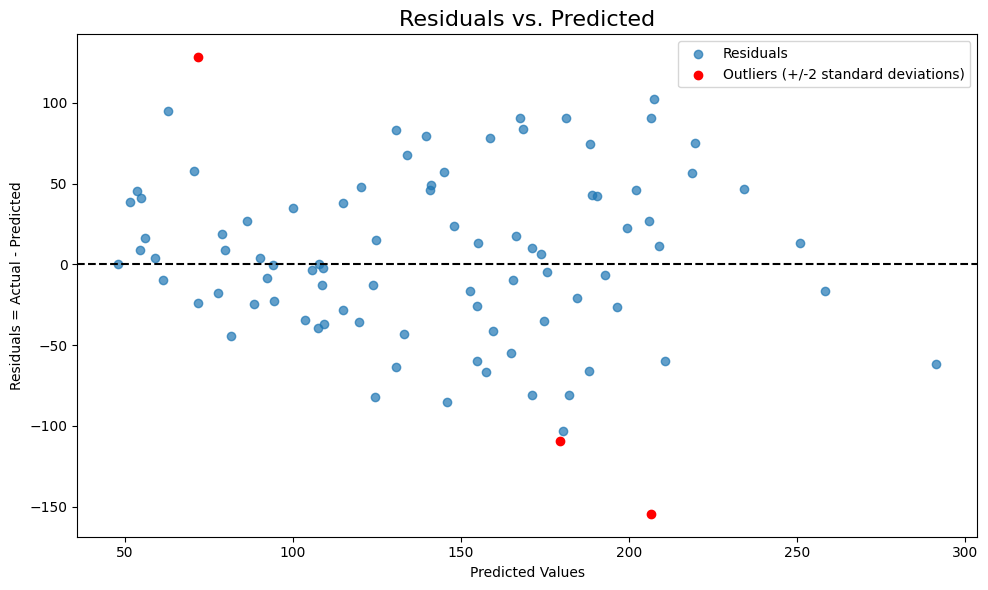

In [ ]:
# Преобразуем все к numpy arrays с одинаковой размерностью
y_test_np = np.array(y_test).flatten()
y_pred_np = np.array(y_pred).flatten()

# Compute residuals
residuals = y_test_np - y_pred_np

# Compute threshold for outliers (+/-2 standard deviations)
std_res = np.std(residuals)
outlier_mask = np.abs(residuals) > 2 * std_res # подсвечиваем остатки, которые выходят за за +- 2*СКО от нулевого уровня

# Create an empty figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot points
ax.scatter(y_pred_np[~outlier_mask], residuals[~outlier_mask], label="Residuals", alpha=0.7)
ax.scatter(y_pred_np[outlier_mask], residuals[outlier_mask], color='red',
           label="Outliers (+/-2 standard deviations)")

# Add reference horizontal line at 0
ax.axhline(0, color='black', linestyle='--')

# Add axis labels and title
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals = Actual - Predicted")
ax.set_title("Residuals vs. Predicted", fontsize=16)
ax.legend()

plt.tight_layout()
plt.show()

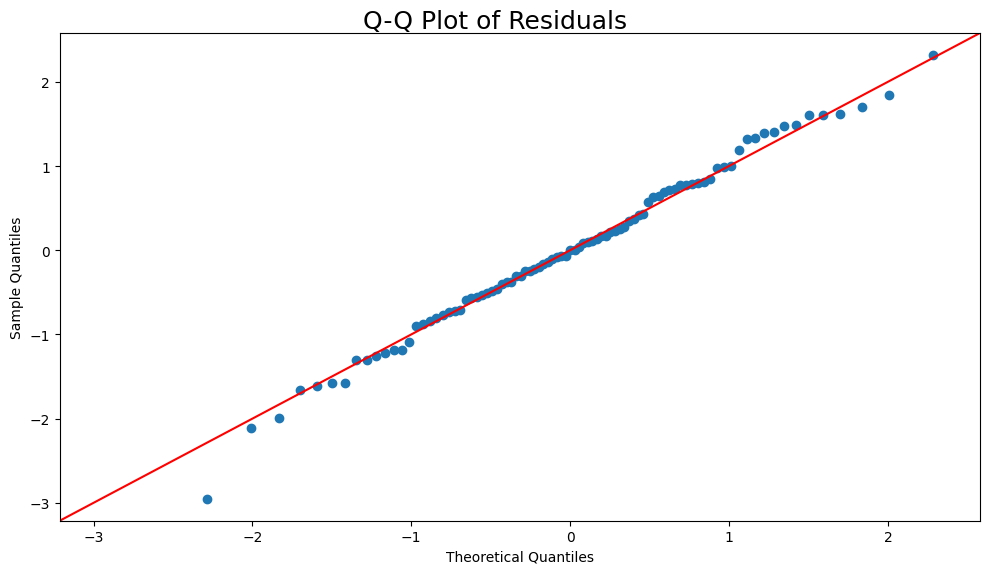

In [ ]:
import statsmodels.api as sm
# Create an empty figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Q-Q plot of residuals on the axes
sm.qqplot(residuals, line='45', fit=True, ax=ax)

# Add title and author ID
fig.suptitle("Q-Q Plot of Residuals", fontsize=18, y=0.95)

plt.tight_layout()
plt.show()

In [ ]:
# Print the intercept (bias term) of the Linear Regression model
print("Intercept:", model_lr.intercept_)

# Create dataframe to display the coefficients for each input feature
coeff_diabetes_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Coefficient': model_lr.coef_.flatten()  # или model_lr.coef_[0]
})

# Sort coefficients by descending absolute value
coeff_diabetes_df = coeff_diabetes_df.sort_values(by='Coefficient', key=abs, ascending=False) # use abs to see coeff regardless of direction (+ or -)

# Display the dataframe
print("Coefficients")
coeff_diabetes_df

Intercept: [151.34560454]
Coefficients


,Feature,Coefficient
4,s1,-931.488846
8,s5,736.198859
2,bmi,542.428759
5,s2,518.062277
3,bp,347.703844
7,s4,275.317902
1,sex,-241.964362
6,s3,163.419983
9,s6,48.670657
0,age,37.904021


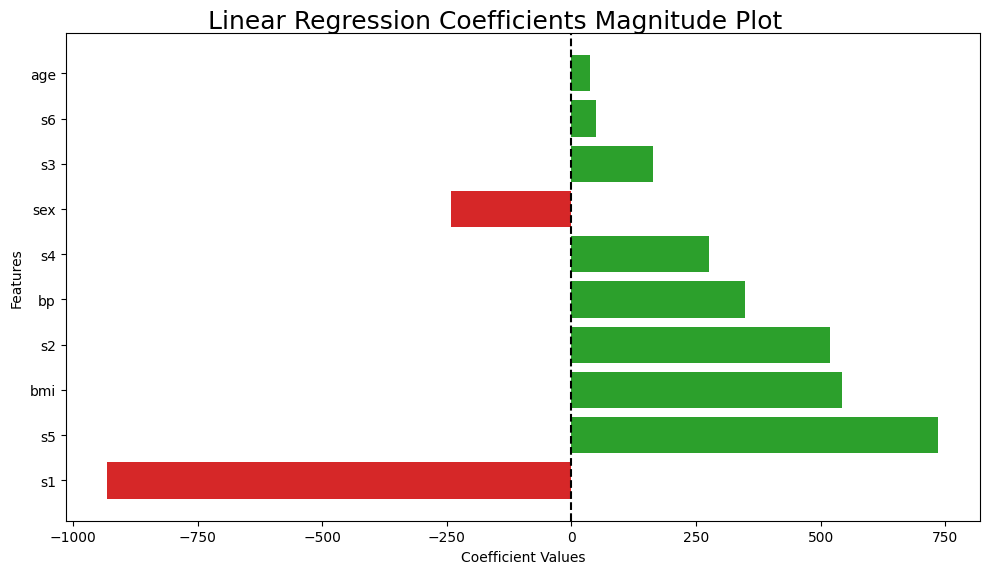

In [ ]:
# Create an empty figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot feature coefficients as horizontal bars
bars = ax.barh(
    coeff_diabetes_df['Feature'],
    coeff_diabetes_df['Coefficient'],
    color=["tab:green" if c > 0 else "tab:red" for c in coeff_diabetes_df['Coefficient']]
)

# Add reference vertical line at 0
ax.axvline(0, color='black', linestyle='--')

# Add axis labels and title, and author ID
ax.set_xlabel("Coefficient Values")
ax.set_ylabel("Features")
fig.suptitle("Linear Regression Coefficients Magnitude Plot", fontsize=18, y=0.95)

plt.tight_layout()
plt.show()

# **Анализ полученной диаграммы**

Это график амплитуды коэффициентов линейной регрессии.

Выводы из графика:

1) bmi оказывает наибольшее влияние на прогноз.

У людей с более высоким индексом массы тела вероятность более быстрого прогрессирования диабета выше.

2) Следующий показатель s5 указывает на уровень триглицеридов в сыворотке крови.

Он также оказывает сильное положительное влияние.
Это логично, поскольку, согласно MedlinePlus, «высокий уровень триглицеридов может привести к атеросклерозу, который повышает риск инфаркта и инсульта» (Medline Plus, 2017).
Это объясняет, почему этот признак может быть таким сильным предиктором в модели.

3) За ним следует bp, которое указывает на артериальное давление.

Высокое артериальное давление связано с более быстрым прогрессированием диабета.

4) С другой стороны, s1 и пол имеют отрицательные коэффициенты.

Это означает, что при повышении этих значений прогнозируемое прогрессирование диабета снижается.

Но s1 указывает на общий уровень холестерина в сыворотке крови, но в модели имеет отрицательный коэффициент. Это кажется маловероятным, поскольку, как указано в MedlinePlus, «высокий уровень общего холестерина может привести к атеросклерозу. Это увеличивает риск инфаркта и инсульта» (Medline Plus, 2022).

Однако это может быть связано с перекрытием с другими признаками, такими как s4 и s5, также связанными с холестерином и триглицеридами. Как я наблюдал ранее в ходе EDA, s1 умеренно коррелирует с s4 и s5.

Модель может разделять сигнал между ними. Поэтому отрицательный коэффициент не означает, что высокий уровень холестерина является защитным фактором. Возможно, это просто связано с корректировкой модели на основе других входных данных.

Что касается пола, модель показывает отрицательный коэффициент, что означает, что более высокие значения пола снижают прогнозируемый результат. Это может означать, что у мужчин (при более высоком кодировании) в данной выборке, как правило, ниже прогнозируемое прогрессирование диабета. Это может отражать закономерности в этом наборе данных, а не обязательно реальные биологические процессы.

5) За ним следует s4, который указывает на общий холестерин/ЛПВП. Он оказывает умеренное положительное влияние на прогрессирование диабета.

Другие характеристики, такие как s3 (ЛПВП, липопротеины высокой плотности), s6 (ГЛУ, уровень сахара в крови) и возраст, не оказывают существенного влияния. Их столбцы небольшие, поэтому они не оказывают существенного влияния на прогноз.